Code runthrough for Pandas tutorial, located at: http://pandas.pydata.org/pandas-docs/stable/10min.html#min

In [82]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Object Creation

In [83]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [84]:
dates = pd.date_range('20170201', periods=6)
dates

DatetimeIndex(['2017-02-01', '2017-02-02', '2017-02-03', '2017-02-04',
               '2017-02-05', '2017-02-06'],
              dtype='datetime64[ns]', freq='D')

In [85]:
x = np.random.randn(6,4)
print(x.shape)
print(x)
df = pd.DataFrame(x, index=dates, columns=list('ABCD') )
df

(6, 4)
[[-1.34130606  0.2665654   1.01002909 -1.38103827]
 [ 1.94226742 -0.84570111 -1.33637849 -2.39635259]
 [-0.13152253  0.36573026  1.60004749 -0.26460072]
 [-1.24501416 -0.27770086 -0.72339034  0.04047325]
 [-0.6356498   0.44070299  0.81384905  0.87282321]
 [-0.22679599 -0.55509746 -0.19777864 -1.0107963 ]]


,A,B,C,D
2017-02-01,-1.341306,0.266565,1.010029,-1.381038
2017-02-02,1.942267,-0.845701,-1.336378,-2.396353
2017-02-03,-0.131523,0.365730,1.600047,-0.264601
2017-02-04,-1.245014,-0.277701,-0.723390,0.040473
2017-02-05,-0.635650,0.440703,0.813849,0.872823
2017-02-06,-0.226796,-0.555097,-0.197779,-1.010796


In [86]:
# Objects that can be converted to "series-like"
df2 = pd.DataFrame({'A' : 1.,
       'B' : pd.Timestamp('20170201'),
       'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
       'D' : np.array([3] * 4, dtype='int32'),
       'E' : pd.Categorical(["test", "train", "test", "train"]),
       'F' : 'foo' })

df2

,A,B,C,D,E,F
0,1.0,2017-02-01,1.0,3,test,foo
1,1.0,2017-02-01,1.0,3,train,foo
2,1.0,2017-02-01,1.0,3,test,foo
3,1.0,2017-02-01,1.0,3,train,foo


In [87]:
# Print out the types in df2.
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

# Viewing Data

In [88]:
df.head()

,A,B,C,D
2017-02-01,-1.341306,0.266565,1.010029,-1.381038
2017-02-02,1.942267,-0.845701,-1.336378,-2.396353
2017-02-03,-0.131523,0.365730,1.600047,-0.264601
2017-02-04,-1.245014,-0.277701,-0.723390,0.040473
2017-02-05,-0.635650,0.440703,0.813849,0.872823


In [89]:
df.tail()

,A,B,C,D
2017-02-02,1.942267,-0.845701,-1.336378,-2.396353
2017-02-03,-0.131523,0.365730,1.600047,-0.264601
2017-02-04,-1.245014,-0.277701,-0.723390,0.040473
2017-02-05,-0.635650,0.440703,0.813849,0.872823
2017-02-06,-0.226796,-0.555097,-0.197779,-1.010796


In [90]:
df.tail(1)

,A,B,C,D
2017-02-06,-0.226796,-0.555097,-0.197779,-1.010796


In [91]:
df.head(1)

,A,B,C,D
2017-02-01,-1.341306,0.266565,1.010029,-1.381038


In [92]:
df.index

DatetimeIndex(['2017-02-01', '2017-02-02', '2017-02-03', '2017-02-04',
               '2017-02-05', '2017-02-06'],
              dtype='datetime64[ns]', freq='D')

In [93]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [94]:
df.values

array([[-1.34130606,  0.2665654 ,  1.01002909, -1.38103827],
       [ 1.94226742, -0.84570111, -1.33637849, -2.39635259],
       [-0.13152253,  0.36573026,  1.60004749, -0.26460072],
       [-1.24501416, -0.27770086, -0.72339034,  0.04047325],
       [-0.6356498 ,  0.44070299,  0.81384905,  0.87282321],
       [-0.22679599, -0.55509746, -0.19777864, -1.0107963 ]])

In [95]:
# Get quick statistics. -- Useful!
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.273004,-0.100917,0.194396,-0.689915
std,1.195589,0.536356,1.128206,1.153174
min,-1.341306,-0.845701,-1.336378,-2.396353
25%,-1.092673,-0.485748,-0.591987,-1.288478
50%,-0.431223,-0.005568,0.308035,-0.637699
75%,-0.155341,0.340939,0.960984,-0.035795
max,1.942267,0.440703,1.600047,0.872823


In [96]:
df.T # Transpose.

,2017-02-01 00:00:00,2017-02-02 00:00:00,2017-02-03 00:00:00,2017-02-04 00:00:00,2017-02-05 00:00:00,2017-02-06 00:00:00
A,-1.341306,1.942267,-0.131523,-1.245014,-0.635650,-0.226796
B,0.266565,-0.845701,0.365730,-0.277701,0.440703,-0.555097
C,1.010029,-1.336378,1.600047,-0.723390,0.813849,-0.197779
D,-1.381038,-2.396353,-0.264601,0.040473,0.872823,-1.010796


In [97]:
df.sort_index(axis=1, ascending=False) # Sort by the 1th axis (starts at 0) -- the dates.

,D,C,B,A
2017-02-01,-1.381038,1.010029,0.266565,-1.341306
2017-02-02,-2.396353,-1.336378,-0.845701,1.942267
2017-02-03,-0.264601,1.600047,0.365730,-0.131523
2017-02-04,0.040473,-0.723390,-0.277701,-1.245014
2017-02-05,0.872823,0.813849,0.440703,-0.635650
2017-02-06,-1.010796,-0.197779,-0.555097,-0.226796


In [98]:
df.sort_values(by='C') # Sort by C.

,A,B,C,D
2017-02-02,1.942267,-0.845701,-1.336378,-2.396353
2017-02-04,-1.245014,-0.277701,-0.723390,0.040473
2017-02-06,-0.226796,-0.555097,-0.197779,-1.010796
2017-02-05,-0.635650,0.440703,0.813849,0.872823
2017-02-01,-1.341306,0.266565,1.010029,-1.381038
2017-02-03,-0.131523,0.365730,1.600047,-0.264601


# Selection

### Getting

In [99]:
df['A'] # To select column "A"
df[0:3] # Rows 0 to 3.

,A,B,C,D
2017-02-01,-1.341306,0.266565,1.010029,-1.381038
2017-02-02,1.942267,-0.845701,-1.336378,-2.396353
2017-02-03,-0.131523,0.365730,1.600047,-0.264601


In [100]:
df['20170201':'20170202'] # Select the rows from Feb1-Feb2.

,A,B,C,D
2017-02-01,-1.341306,0.266565,1.010029,-1.381038
2017-02-02,1.942267,-0.845701,-1.336378,-2.396353


### Selection by Label

In [101]:
df.loc[dates[0]]

A   -1.341306
B    0.266565
C    1.010029
D   -1.381038
Name: 2017-02-01 00:00:00, dtype: float64

In [102]:
df.loc[:,['A','B']] # Select all rows, for columns A and B.

,A,B
2017-02-01,-1.341306,0.266565
2017-02-02,1.942267,-0.845701
2017-02-03,-0.131523,0.365730
2017-02-04,-1.245014,-0.277701
2017-02-05,-0.635650,0.440703
2017-02-06,-0.226796,-0.555097


In [103]:
df.loc['20170201' : '20170203', ['A', 'B']] # Note that slicing here is inclusive.

,A,B
2017-02-01,-1.341306,0.266565
2017-02-02,1.942267,-0.845701
2017-02-03,-0.131523,0.365730


In [104]:
df.loc['20170201', ['A', 'B']]

A   -1.341306
B    0.266565
Name: 2017-02-01 00:00:00, dtype: float64

In [105]:
print(df.loc['20170201', ['A', 'B']].shape) # Dimensions have changed.

(2,)


In [106]:
df.loc['20170201', 'A']

-1.3413060573067372

In [107]:
print(dates[0])
df.at[dates[0], 'A']

2017-02-01 00:00:00


-1.3413060573067372

### Selection by Position

In [108]:
df.iloc[3] # Gets  2017-02-04  located at index = 3.

A   -1.245014
B   -0.277701
C   -0.723390
D    0.040473
Name: 2017-02-04 00:00:00, dtype: float64

In [109]:
df.iloc[3, 0:2]

A   -1.245014
B   -0.277701
Name: 2017-02-04 00:00:00, dtype: float64

In [110]:
df.iloc[3:5,0:2] # Not inclusive...

,A,B
2017-02-04,-1.245014,-0.277701
2017-02-05,-0.635650,0.440703


In [111]:
df.iloc[[1,2,4],[0,2]]

,A,C
2017-02-02,1.942267,-1.336378
2017-02-03,-0.131523,1.600047
2017-02-05,-0.635650,0.813849


In [112]:
df.iloc[1:3,:]

,A,B,C,D
2017-02-02,1.942267,-0.845701,-1.336378,-2.396353
2017-02-03,-0.131523,0.365730,1.600047,-0.264601


In [113]:
df.iloc[1:3]

,A,B,C,D
2017-02-02,1.942267,-0.845701,-1.336378,-2.396353
2017-02-03,-0.131523,0.365730,1.600047,-0.264601


In [114]:
df.iloc[:,3:4]

,D
2017-02-01,-1.381038
2017-02-02,-2.396353
2017-02-03,-0.264601
2017-02-04,0.040473
2017-02-05,0.872823
2017-02-06,-1.010796


In [115]:
df.iloc[2,3]

-0.26460072424740827

In [116]:
df.iat[2,3]

-0.26460072424740827

### Boolean Indexing

In [117]:
df[df.A > 0]

,A,B,C,D
2017-02-02,1.942267,-0.845701,-1.336378,-2.396353


In [118]:
df[df>0]

,A,B,C,D
2017-02-01,NaN,0.266565,1.010029,NaN
2017-02-02,1.942267,NaN,NaN,NaN
2017-02-03,NaN,0.365730,1.600047,NaN
2017-02-04,NaN,NaN,NaN,0.040473
2017-02-05,NaN,0.440703,0.813849,0.872823
2017-02-06,NaN,NaN,NaN,NaN


In [119]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2017-02-01,-1.341306,0.266565,1.010029,-1.381038,one
2017-02-02,1.942267,-0.845701,-1.336378,-2.396353,one
2017-02-03,-0.131523,0.365730,1.600047,-0.264601,two
2017-02-04,-1.245014,-0.277701,-0.723390,0.040473,three
2017-02-05,-0.635650,0.440703,0.813849,0.872823,four
2017-02-06,-0.226796,-0.555097,-0.197779,-1.010796,three


In [120]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2017-02-03,-0.131523,0.365730,1.600047,-0.264601,two
2017-02-05,-0.635650,0.440703,0.813849,0.872823,four


### Setting

In [121]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20170201', periods=6))
s1

2017-02-01    1
2017-02-02    2
2017-02-03    3
2017-02-04    4
2017-02-05    5
2017-02-06    6
Freq: D, dtype: int64

In [122]:
df['F'] = s1
df

,A,B,C,D,F
2017-02-01,-1.341306,0.266565,1.010029,-1.381038,1
2017-02-02,1.942267,-0.845701,-1.336378,-2.396353,2
2017-02-03,-0.131523,0.365730,1.600047,-0.264601,3
2017-02-04,-1.245014,-0.277701,-0.723390,0.040473,4
2017-02-05,-0.635650,0.440703,0.813849,0.872823,5
2017-02-06,-0.226796,-0.555097,-0.197779,-1.010796,6


In [123]:
df.at[dates[0],'A'] = 0
df

,A,B,C,D,F
2017-02-01,0.000000,0.266565,1.010029,-1.381038,1
2017-02-02,1.942267,-0.845701,-1.336378,-2.396353,2
2017-02-03,-0.131523,0.365730,1.600047,-0.264601,3
2017-02-04,-1.245014,-0.277701,-0.723390,0.040473,4
2017-02-05,-0.635650,0.440703,0.813849,0.872823,5
2017-02-06,-0.226796,-0.555097,-0.197779,-1.010796,6


In [124]:
df.iat[0,2] = 0
df

,A,B,C,D,F
2017-02-01,0.000000,0.266565,0.000000,-1.381038,1
2017-02-02,1.942267,-0.845701,-1.336378,-2.396353,2
2017-02-03,-0.131523,0.365730,1.600047,-0.264601,3
2017-02-04,-1.245014,-0.277701,-0.723390,0.040473,4
2017-02-05,-0.635650,0.440703,0.813849,0.872823,5
2017-02-06,-0.226796,-0.555097,-0.197779,-1.010796,6


In [125]:
temp = np.array([5] * len(df))
temp

array([5, 5, 5, 5, 5, 5])

In [126]:
df.loc[:,'D'] = np.array(temp)
df

,A,B,C,D,F
2017-02-01,0.000000,0.266565,0.000000,5,1
2017-02-02,1.942267,-0.845701,-1.336378,5,2
2017-02-03,-0.131523,0.365730,1.600047,5,3
2017-02-04,-1.245014,-0.277701,-0.723390,5,4
2017-02-05,-0.635650,0.440703,0.813849,5,5
2017-02-06,-0.226796,-0.555097,-0.197779,5,6


In [128]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2017-02-01,0.000000,-0.266565,0.000000,-5,-1
2017-02-02,-1.942267,-0.845701,-1.336378,-5,-2
2017-02-03,-0.131523,-0.365730,-1.600047,-5,-3
2017-02-04,-1.245014,-0.277701,-0.723390,-5,-4
2017-02-05,-0.635650,-0.440703,-0.813849,-5,-5
2017-02-06,-0.226796,-0.555097,-0.197779,-5,-6


# Missing Data

In [130]:
df

,A,B,C,D,F
2017-02-01,0.000000,0.266565,0.000000,5,1
2017-02-02,1.942267,-0.845701,-1.336378,5,2
2017-02-03,-0.131523,0.365730,1.600047,5,3
2017-02-04,-1.245014,-0.277701,-0.723390,5,4
2017-02-05,-0.635650,0.440703,0.813849,5,5
2017-02-06,-0.226796,-0.555097,-0.197779,5,6


In [132]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1

,A,B,C,D,F,E
2017-02-01,0.000000,0.266565,0.000000,5,1,NaN
2017-02-02,1.942267,-0.845701,-1.336378,5,2,NaN
2017-02-03,-0.131523,0.365730,1.600047,5,3,NaN
2017-02-04,-1.245014,-0.277701,-0.723390,5,4,NaN


In [135]:
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2017-02-01,0.000000,0.266565,0.000000,5,1,1.0
2017-02-02,1.942267,-0.845701,-1.336378,5,2,1.0
2017-02-03,-0.131523,0.365730,1.600047,5,3,NaN
2017-02-04,-1.245014,-0.277701,-0.723390,5,4,NaN


In [136]:
df1.dropna(how='any')

,A,B,C,D,F,E
2017-02-01,0.000000,0.266565,0.000000,5,1,1.0
2017-02-02,1.942267,-0.845701,-1.336378,5,2,1.0


In [137]:
df1.fillna(value=5)

,A,B,C,D,F,E
2017-02-01,0.000000,0.266565,0.000000,5,1,1.0
2017-02-02,1.942267,-0.845701,-1.336378,5,2,1.0
2017-02-03,-0.131523,0.365730,1.600047,5,3,5.0
2017-02-04,-1.245014,-0.277701,-0.723390,5,4,5.0


In [139]:
pd.isnull(df1) # Boolean mask to see where NAN.

,A,B,C,D,F,E
2017-02-01,False,False,False,False,False,False
2017-02-02,False,False,False,False,False,False
2017-02-03,False,False,False,False,False,True
2017-02-04,False,False,False,False,False,True


# Operations

### Stats

In [140]:
df.mean()

A   -0.049453
B   -0.100917
C    0.026058
D    5.000000
F    3.500000
dtype: float64

In [141]:
df.mean(1) # Mean of axis 1.

2017-02-01    1.253313
2017-02-02    1.352038
2017-02-03    1.966851
2017-02-04    1.350779
2017-02-05    2.123780
2017-02-06    2.004066
Freq: D, dtype: float64

In [144]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates)
s

2017-02-01    1.0
2017-02-02    3.0
2017-02-03    5.0
2017-02-04    NaN
2017-02-05    6.0
2017-02-06    8.0
Freq: D, dtype: float64

In [146]:
s = s.shift(2)
s

2017-02-01    NaN
2017-02-02    NaN
2017-02-03    1.0
2017-02-04    3.0
2017-02-05    5.0
2017-02-06    NaN
Freq: D, dtype: float64

In [147]:
df.sub(s, axis='index')

,A,B,C,D,F
2017-02-01,NaN,NaN,NaN,NaN,NaN
2017-02-02,NaN,NaN,NaN,NaN,NaN
2017-02-03,-1.131523,-0.634270,0.600047,4.0,2.0
2017-02-04,-4.245014,-3.277701,-3.723390,2.0,1.0
2017-02-05,-5.635650,-4.559297,-4.186151,0.0,0.0
2017-02-06,NaN,NaN,NaN,NaN,NaN


### Apply

In [149]:
df

,A,B,C,D,F
2017-02-01,0.000000,0.266565,0.000000,5,1
2017-02-02,1.942267,-0.845701,-1.336378,5,2
2017-02-03,-0.131523,0.365730,1.600047,5,3
2017-02-04,-1.245014,-0.277701,-0.723390,5,4
2017-02-05,-0.635650,0.440703,0.813849,5,5
2017-02-06,-0.226796,-0.555097,-0.197779,5,6


In [150]:
df.apply(np.cumsum)

,A,B,C,D,F
2017-02-01,0.000000,0.266565,0.000000,5,1
2017-02-02,1.942267,-0.579136,-1.336378,10,3
2017-02-03,1.810745,-0.213405,0.263669,15,6
2017-02-04,0.565731,-0.491106,-0.459721,20,10
2017-02-05,-0.069919,-0.050403,0.354128,25,15
2017-02-06,-0.296715,-0.605501,0.156349,30,21


In [152]:
df.apply(lambda x: x.max() - x.min()) # Passing by columns.

A    3.187282
B    1.286404
C    2.936426
D    0.000000
F    5.000000
dtype: float64

### Histogramming

In [153]:
s = pd.Series(np.random.randint(0,7, size=10))
s

0    2
1    0
2    0
3    3
4    6
5    1
6    3
7    5
8    0
9    1
dtype: int64

In [158]:
s.value_counts().sort_index()

0    3
1    2
2    1
3    2
5    1
6    1
dtype: int64

In [161]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# Merge

### Concat

In [163]:
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,0.367125,0.704400,0.316116,-0.765339
1,-0.834644,-1.639343,-1.515061,2.081502
2,1.359955,0.244222,-0.575767,-1.107505
3,0.347539,-1.413877,-0.199213,0.695090
4,-0.512785,-1.118234,1.308215,0.423963
5,1.136351,-0.458028,-1.171542,1.728857
6,0.257020,0.721273,-0.351734,-0.598811
7,-0.191565,-0.508600,0.419228,-1.421784
8,-1.024493,1.136391,0.636862,0.219984
9,1.235688,0.925804,-0.766899,-1.136588


In [166]:
pieces = [df[:3], df[3:6], df[6:]]
pieces

[          0         1         2         3
 0  0.367125  0.704400  0.316116 -0.765339
 1 -0.834644 -1.639343 -1.515061  2.081502
 2  1.359955  0.244222 -0.575767 -1.107505,
           0         1         2         3
 3  0.347539 -1.413877 -0.199213  0.695090
 4 -0.512785 -1.118234  1.308215  0.423963
 5  1.136351 -0.458028 -1.171542  1.728857,
           0         1         2         3
 6  0.257020  0.721273 -0.351734 -0.598811
 7 -0.191565 -0.508600  0.419228 -1.421784
 8 -1.024493  1.136391  0.636862  0.219984
 9  1.235688  0.925804 -0.766899 -1.136588]

In [167]:
pd.concat(pieces)

,0,1,2,3
0,0.367125,0.704400,0.316116,-0.765339
1,-0.834644,-1.639343,-1.515061,2.081502
2,1.359955,0.244222,-0.575767,-1.107505
3,0.347539,-1.413877,-0.199213,0.695090
4,-0.512785,-1.118234,1.308215,0.423963
5,1.136351,-0.458028,-1.171542,1.728857
6,0.257020,0.721273,-0.351734,-0.598811
7,-0.191565,-0.508600,0.419228,-1.421784
8,-1.024493,1.136391,0.636862,0.219984
9,1.235688,0.925804,-0.766899,-1.136588


### Join

In [173]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,bar,2


In [174]:
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,bar,5


In [175]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


### Append

In [176]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

,A,B,C,D
0,-1.352744,0.669614,0.968712,1.737936
1,-0.457471,-1.299007,1.076705,-0.944512
2,-0.628660,1.361387,-1.025111,-0.280128
3,-0.185207,0.232903,0.757218,-0.773022
4,1.516732,0.796255,-2.484004,0.320377
5,-0.052412,0.052913,0.735213,-0.440536
6,0.464733,1.475756,-0.516469,-0.158309
7,2.223026,1.963656,0.793533,0.754606


In [177]:
s = df.iloc[3]
s

A   -0.185207
B    0.232903
C    0.757218
D   -0.773022
Name: 3, dtype: float64

In [180]:
df = df.append(s, ignore_index=True)
df

,A,B,C,D
0,-1.352744,0.669614,0.968712,1.737936
1,-0.457471,-1.299007,1.076705,-0.944512
2,-0.628660,1.361387,-1.025111,-0.280128
3,-0.185207,0.232903,0.757218,-0.773022
4,1.516732,0.796255,-2.484004,0.320377
5,-0.052412,0.052913,0.735213,-0.440536
6,0.464733,1.475756,-0.516469,-0.158309
7,2.223026,1.963656,0.793533,0.754606
8,-0.185207,0.232903,0.757218,-0.773022


In [182]:
df.append(s) # ignore_index=False

,A,B,C,D
0,-1.352744,0.669614,0.968712,1.737936
1,-0.457471,-1.299007,1.076705,-0.944512
2,-0.628660,1.361387,-1.025111,-0.280128
3,-0.185207,0.232903,0.757218,-0.773022
4,1.516732,0.796255,-2.484004,0.320377
5,-0.052412,0.052913,0.735213,-0.440536
6,0.464733,1.475756,-0.516469,-0.158309
7,2.223026,1.963656,0.793533,0.754606
8,-0.185207,0.232903,0.757218,-0.773022
3,-0.185207,0.232903,0.757218,-0.773022


# Grouping

In [184]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
   ....:                           'foo', 'bar', 'foo', 'foo'],
   ....:                    'B' : ['one', 'one', 'two', 'three',
   ....:                           'two', 'two', 'one', 'three'],
   ....:                    'C' : np.random.randn(8),
   ....:                    'D' : np.random.randn(8)})

df

,A,B,C,D
0,foo,one,1.897241,0.421460
1,bar,one,-0.516418,-0.179917
2,foo,two,-0.121293,0.333979
3,bar,three,-0.583529,-0.320344
4,foo,two,-0.168007,0.085412
5,bar,two,0.780230,1.812363
6,foo,one,-0.563046,0.631205
7,foo,three,-1.322415,-0.488179


In [185]:
df.groupby('A').sum()

,C,D
A,,
bar,-0.319717,1.312102
foo,-0.277520,0.983877


# Reshaping

### Stack

In [186]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
   ....:                      'foo', 'foo', 'qux', 'qux'],
   ....:                     ['one', 'two', 'one', 'two',
   ....:                      'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [187]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])

In [188]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df2 = df[:4]
df2

A         B
first second                    
bar   one    -1.301733  1.225247
      two     0.254113 -0.064618
baz   one    -1.005265  1.643823
      two     0.988117 -1.552998

In [190]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -1.301733
               B    1.225247
       two     A    0.254113
               B   -0.064618
baz    one     A   -1.005265
               B    1.643823
       two     A    0.988117
               B   -1.552998
dtype: float64

In [191]:
stacked.unstack()

A         B
first second                    
bar   one    -1.301733  1.225247
      two     0.254113 -0.064618
baz   one    -1.005265  1.643823
      two     0.988117 -1.552998

In [192]:
stacked.unstack(1)

second        one       two
first                      
bar   A -1.301733  0.254113
      B  1.225247 -0.064618
baz   A -1.005265  0.988117
      B  1.643823 -1.552998

In [193]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -1.301733 -1.005265
       B  1.225247  1.643823
two    A  0.254113  0.988117
       B -0.064618 -1.552998

### Pivot Tables

### Time Series

### Categoricals

In [194]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [197]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): [very good, good, very bad]

# Plotting

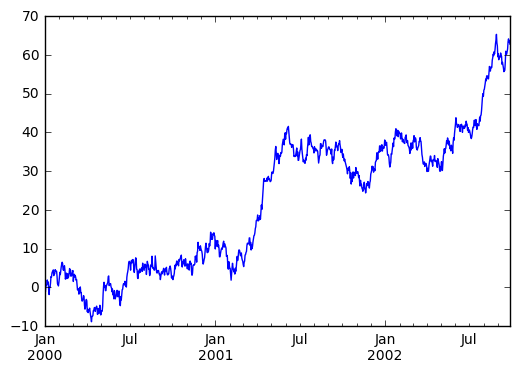

In [216]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()
plt.show()

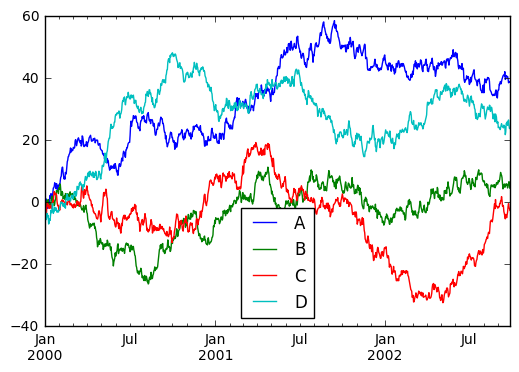

In [217]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')
plt.show()

# Getting Data In/Out

### CSV

In [218]:
df.to_csv('df.csv')

In [219]:
pd.read_csv('df.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.204218,-0.313904,-1.931319,-1.849885
1,2000-01-02,1.164656,-1.188812,-2.460209,-2.638139
2,2000-01-03,0.864819,-0.894679,-3.921989,-4.420981
3,2000-01-04,0.987460,0.440535,-4.758589,-5.593245
4,2000-01-05,-1.769578,0.105911,-1.113445,-4.807857
5,2000-01-06,-1.913493,-0.346249,-0.192373,-3.655577
6,2000-01-07,-1.945294,0.171222,-0.463689,-4.572533
7,2000-01-08,-1.750437,0.903865,-1.424172,-4.301892
8,2000-01-09,-0.548427,-0.236904,-0.898370,-7.012911
9,2000-01-10,0.104408,-1.753151,-1.978395,-6.617014


### HDF5

### Excel

In [223]:
df.to_excel('df.xlsx', sheet_name='Sheet1')

In [224]:
pd.read_excel('df.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,A,B,C,D
2000-01-01,0.204218,-0.313904,-1.931319,-1.849885
2000-01-02,1.164656,-1.188812,-2.460209,-2.638139
2000-01-03,0.864819,-0.894679,-3.921989,-4.420981
2000-01-04,0.987460,0.440535,-4.758589,-5.593245
2000-01-05,-1.769578,0.105911,-1.113445,-4.807857
2000-01-06,-1.913493,-0.346249,-0.192373,-3.655577
2000-01-07,-1.945294,0.171222,-0.463689,-4.572533
2000-01-08,-1.750437,0.903865,-1.424172,-4.301892
2000-01-09,-0.548427,-0.236904,-0.898370,-7.012911
2000-01-10,0.104408,-1.753151,-1.978395,-6.617014
